In [1]:
import os
import numpy as np
from PIL import Image
# Criação de diretórios e imagens simuladas
base_path = "/content/test_dataset"
for category in ['maca', 'banana']:
    os.makedirs(os.path.join(base_path, category), exist_ok=True)

def create_image(filepath, label):
    img = Image.new('RGB', (224, 224), color='red' if label == 'maca' else 'yellow')
    img.save(filepath)

for i in range(10):
    create_image(f"{base_path}/maca/maca_{i}.jpg", 'maca')
    create_image(f"{base_path}/banana/banana_{i}.jpg", 'banana')


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=4,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=4,
    class_mode='binary',
    subset='validation'
)

Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [4]:
history = model.fit(train_data, validation_data=val_data, epochs=5)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - accuracy: 0.3417 - loss: 5.4862 - val_accuracy: 0.5000 - val_loss: 0.7767
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.6333 - loss: 0.6468 - val_accuracy: 1.0000 - val_loss: 0.1475
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 1.0000 - loss: 0.1341 - val_accuracy: 1.0000 - val_loss: 0.0128
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0014


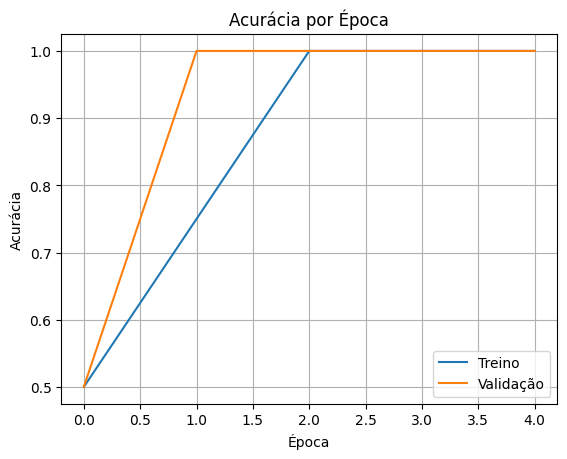

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predição: BANANA (1.00)


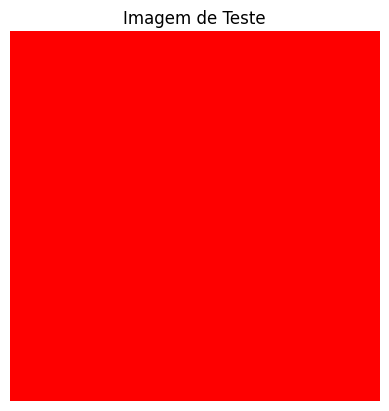

In [6]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = "/content/test_dataset/maca/maca_0.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model.predict(img_array)

if prediction[0][0] >= 0.5:
    print(f"Predição: BANANA ({prediction[0][0]:.2f})")
else:
    print(f"Predição: MACA ({1 - prediction[0][0]:.2f})")

plt.imshow(img)
plt.axis('off')
plt.title("Imagem de Teste")
plt.show()